<a href="https://colab.research.google.com/github/kakods/Oxford-102-Flowers/blob/master/Oxford_102_Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
path=untar_data(URLs.FLOWERS)

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-102-flowers/test.txt'),
 PosixPath('/root/.fastai/data/oxford-102-flowers/jpg'),
 PosixPath('/root/.fastai/data/oxford-102-flowers/train.txt'),
 PosixPath('/root/.fastai/data/oxford-102-flowers/valid.txt')]

In [0]:
path/'train.txt'

PosixPath('/root/.fastai/data/oxford-102-flowers/train.txt')

In [0]:
df=DataFrame(np.loadtxt(path/'train.txt',dtype='str').tolist())

In [0]:
df.head()

,0,1
0,jpg/image_03860.jpg,16
1,jpg/image_06092.jpg,13
2,jpg/image_02400.jpg,42
3,jpg/image_02852.jpg,55
4,jpg/image_07710.jpg,96


In [0]:
img=open_image(path/'jpg/image_03860.jpg')

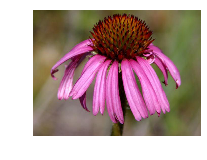

In [0]:
img.show()

In [0]:
img.size

torch.Size([500, 667])

In [0]:
valid_df=DataFrame(np.loadtxt(path/'valid.txt',dtype='str').tolist())

In [0]:
valid_df['is_valid']=True

In [0]:
valid_df.head()

,0,1,is_valid
0,jpg/image_04467.jpg,89,True
1,jpg/image_07129.jpg,44,True
2,jpg/image_05166.jpg,4,True
3,jpg/image_07002.jpg,34,True
4,jpg/image_02007.jpg,79,True


In [0]:
df['is_valid']=False

In [0]:
df.head()

,0,1,is_valid
0,jpg/image_03860.jpg,16,False
1,jpg/image_06092.jpg,13,False
2,jpg/image_02400.jpg,42,False
3,jpg/image_02852.jpg,55,False
4,jpg/image_07710.jpg,96,False


In [0]:
df_train=df.append(valid_df)

In [0]:
data=(ImageList.from_df(df_train,path)
               .split_from_df()
               .label_from_df()
               .transform(get_transforms(),size=224)
               .add_test_folder()
               .databunch(bs=64).normalize(imagenet_stats))

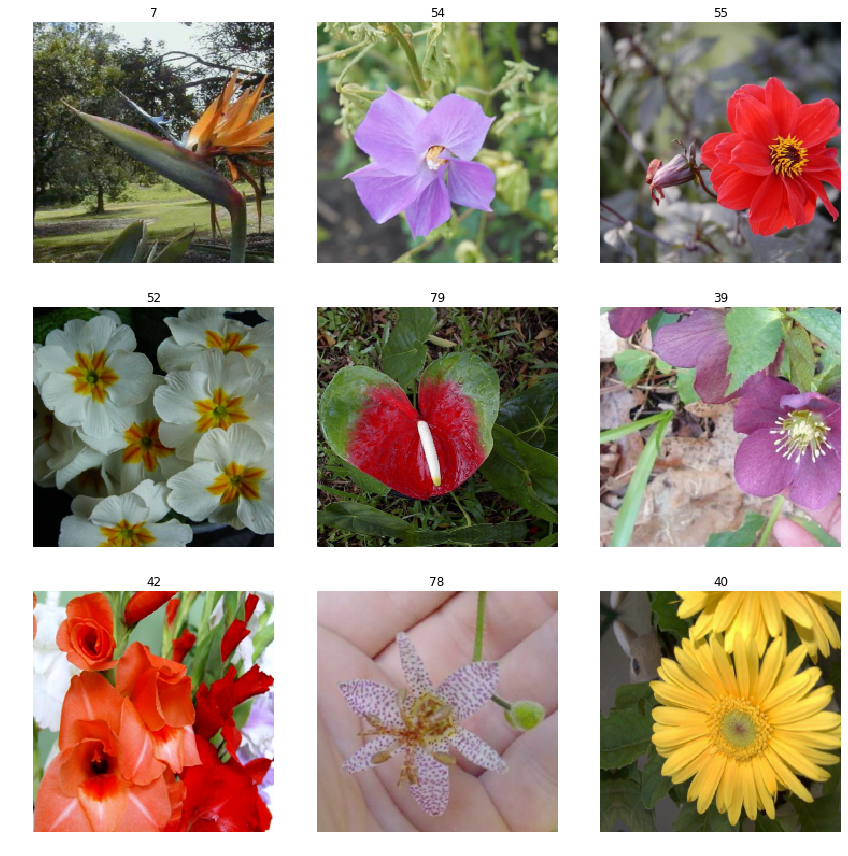

In [0]:
data.show_batch(rows=3)

In [0]:
learn=cnn_learner(data,models.resnet101,metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth
100%|██████████| 178728960/178728960 [00:01<00:00, 99916469.02it/s] 


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


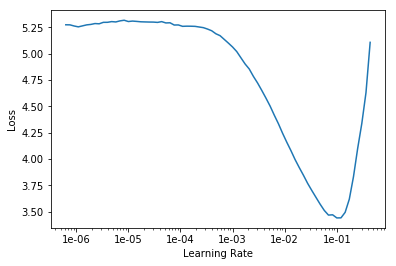

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(10,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.373566,2.586792,0.516667,00:46
1,2.761562,1.210349,0.700980,00:45
2,1.778651,0.977931,0.733333,00:45
3,1.243750,1.152671,0.693137,00:45
4,0.953179,1.116100,0.697059,00:45
5,0.741698,0.838812,0.787255,00:45
6,0.564105,0.654488,0.830392,00:45
7,0.432160,0.462842,0.869608,00:45
8,0.328328,0.414428,0.882353,00:45
9,0.254998,0.394775,0.884314,00:45


In [0]:
learn.save('stage-1')

In [0]:
learn=learn.load('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(10,slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.056984,0.384487,0.889216,00:45
1,0.049936,0.365314,0.896078,00:46
2,0.049608,0.356480,0.909804,00:47
3,0.041703,0.351612,0.898039,00:46
4,0.035492,0.323462,0.920588,00:47
5,0.029894,0.311786,0.921569,00:46
6,0.025627,0.299037,0.923529,00:46
7,0.022407,0.295146,0.919608,00:47
8,0.020115,0.295549,0.921569,00:46
9,0.017986,0.298181,0.922549,00:47


In [0]:
learn.save('stage-2')

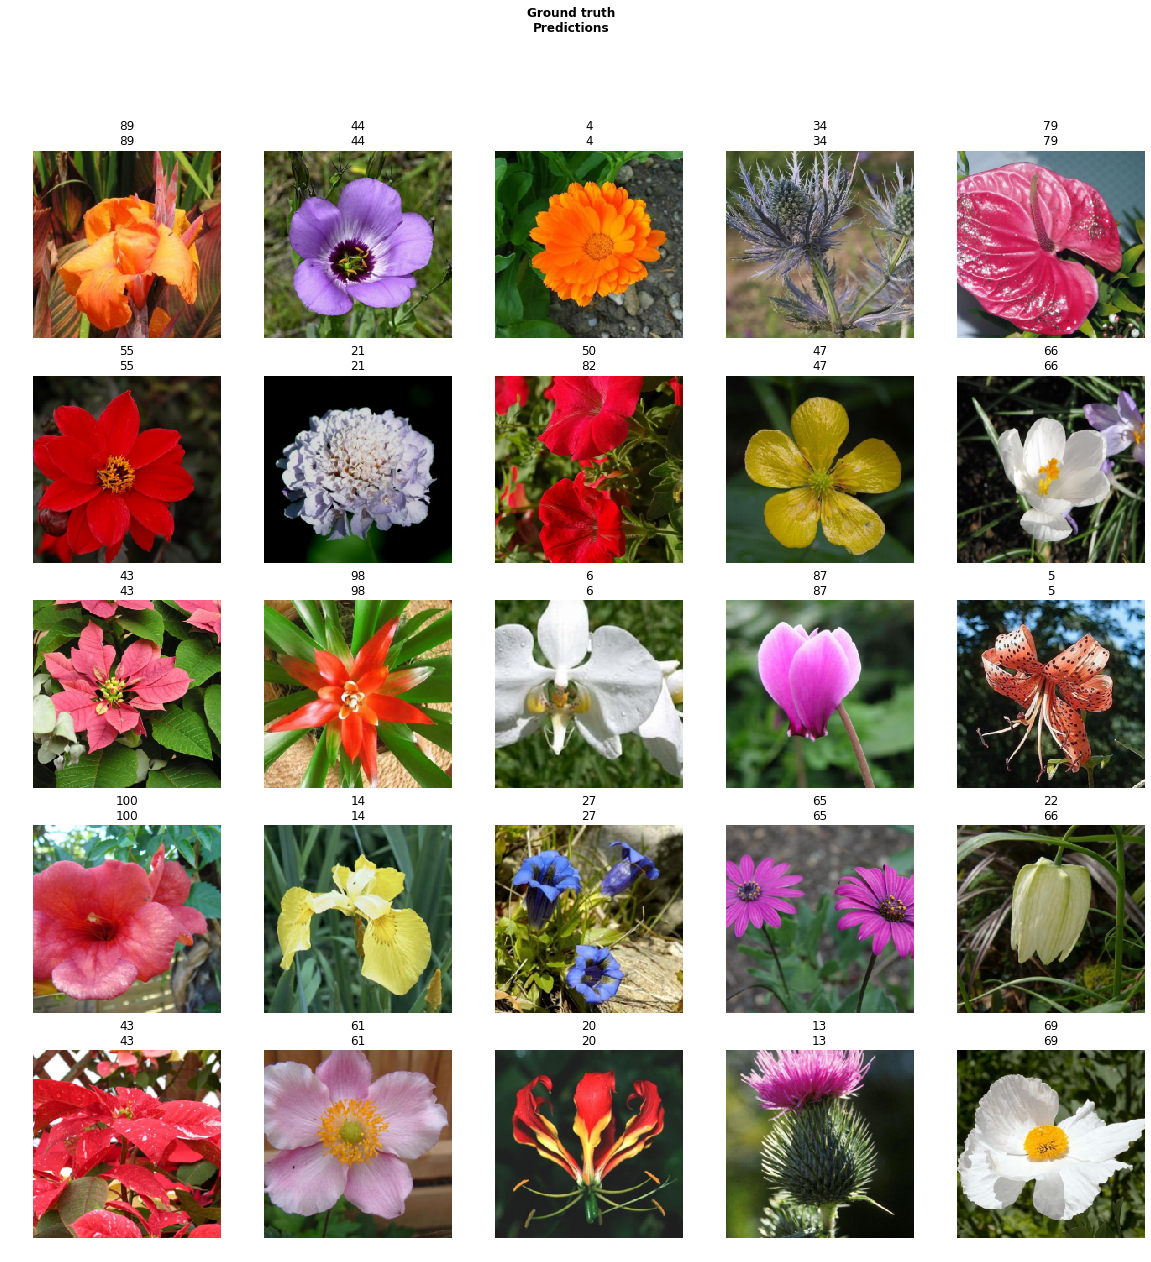

In [0]:
learn.show_results()

In [0]:
test_df=DataFrame(np.loadtxt(path/'test.txt',dtype='str').tolist())

In [0]:
test_df['is_valid']=True
df_test=df.append(test_df)

In [0]:
test_data=(ImageList.from_df(df_test,path)
                    .split_from_df()
                    .label_from_df()
                    .transform(get_transforms(),size=224)
                    .databunch(bs=64).normalize(imagenet_stats))

In [0]:
learn=learn.load('stage-2')

In [0]:
learn.validate(test_data.valid_dl)

[0.3998953, tensor(0.8928)]

In [0]:
data=(ImageList.from_df(df_train,path)
               .split_from_df()
               .label_from_df()
               .transform(get_transforms(),size=256)
               .add_test_folder()
               .databunch(bs=32).normalize(imagenet_stats))

In [0]:
learn=learn.load('stage-2')

In [0]:
learn.data=data

In [0]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


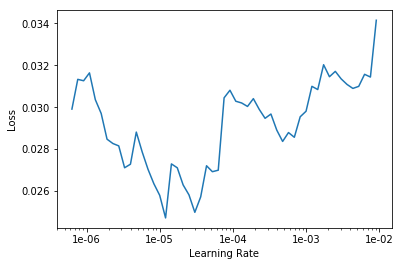

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5,3e-6)

epoch,train_loss,valid_loss,accuracy,time
0,0.030061,0.277095,0.941176,00:31
1,0.026189,0.282721,0.935294,00:30
2,0.022018,0.279276,0.938235,00:31
3,0.021304,0.280072,0.933333,00:30
4,0.022187,0.276702,0.937255,00:31


In [0]:
learn.save('stage-256-1')

In [0]:
learn=learn.load('stage-256-1')

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(10,slice(1e-7,1e-6))

epoch,train_loss,valid_loss,accuracy,time
0,0.032121,0.279491,0.934314,00:33
1,0.027306,0.279064,0.935294,00:34
2,0.023382,0.284455,0.933333,00:34
3,0.025948,0.282266,0.933333,00:34
4,0.023294,0.277387,0.939216,00:34
5,0.024280,0.283995,0.930392,00:34
6,0.024325,0.282313,0.936275,00:34
7,0.024244,0.284384,0.934314,00:34
8,0.021664,0.281236,0.932353,00:33
9,0.021838,0.279244,0.935294,00:34


In [0]:
learn.save('stage-256-2')

In [0]:
test_data=(ImageList.from_df(df_test,path)
                    .split_from_df()
                    .label_from_df()
                    .transform(get_transforms(),size=256)
                    .databunch(bs=32).normalize(imagenet_stats))

In [0]:
learn.validate(test_data.valid_dl)

[0.36065316, tensor(0.9034)]

In [0]:
data=(ImageList.from_df(df_train,path)
               .split_from_df()
               .label_from_df()
               .transform(get_transforms(),size=512)
               .add_test_folder()
               .databunch(bs=16).normalize(imagenet_stats))

In [0]:
learn.data=data

In [0]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


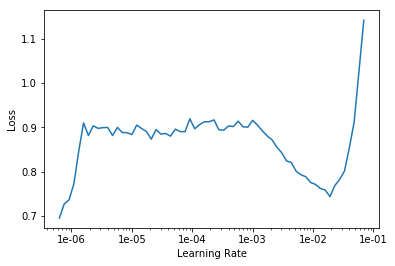

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5,3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.520674,0.514950,0.860784,01:27
1,0.381357,0.635903,0.839216,01:25
2,0.358002,0.522139,0.857843,01:25
3,0.218914,0.303498,0.917647,01:25
4,0.139380,0.287823,0.922549,01:26


In [0]:
learn.save('512-1')

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(10,slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.140227,0.442153,0.881373,01:52
1,0.706081,2.441403,0.487255,01:49
2,1.251481,1.320897,0.666667,01:50
3,0.935379,1.175770,0.682353,01:49
4,0.675467,0.610723,0.835294,01:49
5,0.408168,0.448050,0.871569,01:49
6,0.243400,0.332544,0.901961,01:49
7,0.133184,0.262036,0.932353,01:49
8,0.075534,0.246167,0.935294,01:49
9,0.062877,0.246274,0.936275,01:49


In [0]:
learn.save('512-2')

In [0]:
test_data=(ImageList.from_df(df_test,path)
                    .split_from_df()
                    .label_from_df()
                    .transform(get_transforms(),size=512)
                    .databunch(bs=16).normalize(imagenet_stats))

In [0]:
learn.validate(test_data.valid_dl)

[0.30524158, tensor(0.9172)]

In [0]:
data=(ImageList.from_df(df_train,path)
               .split_from_df()
               .label_from_df()
               .transform(get_transforms(),size=600)
               .add_test_folder()
               .databunch(bs=8).normalize(imagenet_stats))

In [0]:
learn.data=data

In [0]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


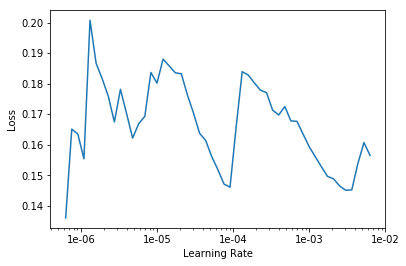

In [0]:
learn.lr_find()
learn.recorder.plot(skip_ends=100)

In [0]:
learn.fit_one_cycle(5,1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.155513,0.272408,0.931373,02:23
1,0.179939,0.345346,0.902941,02:20
2,0.137831,0.287350,0.924510,02:21
3,0.108568,0.290172,0.927451,02:20
4,0.083496,0.263756,0.931373,02:21


In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(10,slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.082885,0.247059,0.935294,02:53
1,0.052594,0.239543,0.943137,02:56
2,0.060273,0.260915,0.932353,02:56
3,0.091739,0.273073,0.929412,02:56
4,0.071220,0.248706,0.936275,02:57
5,0.056988,0.238456,0.941176,02:56
6,0.048377,0.235001,0.934314,02:56
7,0.062057,0.236364,0.943137,02:56
8,0.060101,0.227259,0.940196,02:56
9,0.029386,0.226658,0.940196,02:55


In [0]:
learn.save('600')

In [0]:
test_data=(ImageList.from_df(df_test,path)
                    .split_from_df()
                    .label_from_df()
                    .transform(get_transforms(),size=600)
                    .databunch(bs=8).normalize(imagenet_stats))

In [0]:
learn.validate(test_data.valid_dl)

[0.27036363, tensor(0.9257)]